# **Data Glacier Final Project **

**Specialization** : Data Science

**Project Name**: Bank Marketing (Campaign)

**Group Name** : Data Scientist Geeks

**Team member 1 Name**:
*Tasnime Hamdeni*  |   National Engineering School of Tunis |   Tunisia

 **Team member 2 Name** 
 *Refka Mejri*    |     National Engineering School of Tunis |  Tunisia


## **Import libraries**

In [1]:
pip install category_encoders

Note: you may need to restart the kernel to use updated packages.


In [34]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats

import matplotlib.pyplot as plt

# Load libraries
from pandas import read_csv
from pandas.plotting import scatter_matrix
# import matplotlib
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import category_encoders as ce

# Data reading

In [35]:
df= pd.read_excel('bank-additional-full.xlsx')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [37]:
df.shape

(41188, 21)

# Descriptive statistics

In [38]:
print(df.describe())

               age      duration      campaign         pdays      previous  \
count  41188.00000  41188.000000  41188.000000  41188.000000  41188.000000   
mean      40.02406    258.285010      2.567593    962.475454      0.172963   
std       10.42125    259.279249      2.770014    186.910907      0.494901   
min       17.00000      0.000000      1.000000      0.000000      0.000000   
25%       32.00000    102.000000      1.000000    999.000000      0.000000   
50%       38.00000    180.000000      2.000000    999.000000      0.000000   
75%       47.00000    319.000000      3.000000    999.000000      0.000000   
max       98.00000   4918.000000     56.000000    999.000000      7.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count  41188.000000    41188.000000   41188.000000  41188.000000  41188.000000  
mean       0.081886       93.575664     -40.502600      3.621291   5167.035911  
std        1.570960        0.578840       4.628198    

# Problems in the data

### Skewness + NA values + Outliers

In [39]:
df.skew()

age               0.784697
duration          3.263141
campaign          4.762507
pdays            -4.922190
previous          3.832042
emp.var.rate     -0.724096
cons.price.idx   -0.230888
cons.conf.idx     0.303180
euribor3m        -0.709188
nr.employed      -1.044262
dtype: float64

In [40]:
print(df.groupby('y').size())

y
no     36548
yes     4640
dtype: int64


NameError: name 'pyplot' is not defined

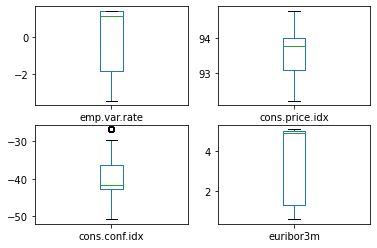

In [41]:
# box and whisker plots
df1=df.iloc[:,15:19]
df1.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
pyplot.show()

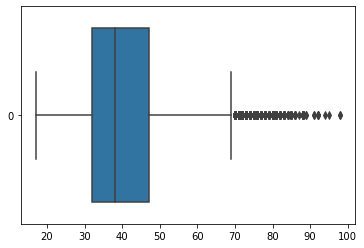

In [42]:
sns.boxplot(data = df.age, orient ='h')
plt.show()

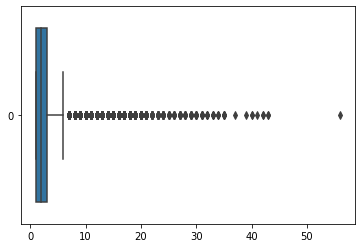

In [43]:
sns.boxplot(data = df.campaign, orient ='h')
plt.show()

## removing outliers


In [44]:
#detecting outliers using z score

z = np.abs(stats.zscore(df.age))
print(z)

[1.53303429 1.62899323 0.29018564 ... 1.53303429 0.38152696 3.26029527]


In [45]:
threshold = 3
print(np.where(z > 3))

(array([27757, 27780, 27800, 27802, 27805, 27808, 27810, 27811, 27812,
       27813, 27814, 27815, 27816, 27817, 27818, 27826, 27851, 27875,
       27930, 27950, 27951, 27963, 28220, 28221, 28312, 28456, 29263,
       29498, 29625, 29682, 29973, 29977, 29981, 29990, 30000, 30004,
       30006, 30072, 30078, 30079, 30103, 30110, 30133, 30171, 30214,
       30225, 30241, 30334, 30430, 30460, 30589, 35833, 35856, 35878,
       35973, 36183, 36285, 36311, 36383, 36384, 36816, 36998, 37136,
       37137, 37186, 37190, 37192, 37193, 37195, 37206, 37207, 37213,
       37219, 37235, 37237, 37239, 37257, 37260, 37341, 37355, 37403,
       37454, 37455, 37472, 37479, 37493, 37505, 37509, 37512, 37525,
       37532, 37597, 37601, 37602, 37604, 37635, 37675, 37679, 37690,
       37692, 37715, 37735, 37736, 37743, 37756, 37769, 37775, 37784,
       37818, 37819, 37820, 37861, 37868, 37870, 37873, 37905, 37920,
       37946, 37951, 37952, 37954, 37999, 38005, 38019, 38020, 38022,
       38032, 38033

In [48]:
#shape before removing outliers
df.shape


(41188, 21)

In [50]:
# removing outliers
df1 = df[(z < 3)]
#shape after removing outliers
df1.shape


(40819, 21)

# change the type of the data

In [13]:
# changer le type de la colonne sexe de object à category
df["job"] = df["job"].astype('category')
df["marital"] = df["marital"].astype('category')
df["education"] = df["education"].astype('category')
df["default"] = df["default"].astype('category')
df["housing"] = df["housing"].astype('category')
df["loan"] = df["loan"].astype('category')
df["contact"] = df["contact"].astype('category')
df["month"] = df["month"].astype('category')
df["day_of_week"] = df["day_of_week"].astype('category')
df["duration"] = df["duration"].astype('int64')
df["poutcome"] = df["poutcome"].astype('category')
df["y"] = df["y"].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             41188 non-null  int64   
 1   job             41188 non-null  category
 2   marital         41188 non-null  category
 3   education       41188 non-null  category
 4   default         41188 non-null  category
 5   housing         41188 non-null  category
 6   loan            41188 non-null  category
 7   contact         41188 non-null  category
 8   month           41188 non-null  category
 9   day_of_week     41188 non-null  category
 10  duration        41188 non-null  int64   
 11  campaign        41188 non-null  int64   
 12  pdays           41188 non-null  int64   
 13  previous        41188 non-null  int64   
 14  poutcome        41188 non-null  category
 15  emp.var.rate    41188 non-null  float64 
 16  cons.price.idx  41188 non-null  float64 
 17  cons.conf.id

# Verifier qu'il n'y a pas d'intrus dans les données catégoriques

In [48]:
#number of clients according to their jobs
df["job"].unique()
print('job \n ', np.array(np.unique(df['job'], return_counts=True)).T)


job 
  [['admin.' 10422]
 ['blue-collar' 9254]
 ['entrepreneur' 1456]
 ['housemaid' 1060]
 ['management' 2924]
 ['retired' 1720]
 ['self-employed' 1421]
 ['services' 3969]
 ['student' 875]
 ['technician' 6743]
 ['unemployed' 1014]
 ['unknown' 330]]


In [47]:
# number of clients according to their merital situation
print(df["marital"].unique())
print('marital \n ', np.array(np.unique(df['marital'], return_counts=True)).T)


['married', 'single', 'divorced', 'unknown']
Categories (4, object): ['married', 'single', 'divorced', 'unknown']
marital 
  [['divorced' 4612]
 ['married' 24928]
 ['single' 11568]
 ['unknown' 80]]


In [45]:
#number of clients according to their level of education
print(df["education"].unique())
print('education \n ', np.array(np.unique(df['education'], return_counts=True)).T)


['basic.4y', 'high.school', 'basic.6y', 'basic.9y', 'professional.course', 'unknown', 'university.degree', 'illiterate']
Categories (8, object): ['basic.4y', 'high.school', 'basic.6y', 'basic.9y', 'professional.course', 'unknown', 'university.degree', 'illiterate']
education 
  [['basic.4y' 4176]
 ['basic.6y' 2292]
 ['basic.9y' 6045]
 ['high.school' 9515]
 ['illiterate' 18]
 ['professional.course' 5243]
 ['university.degree' 12168]
 ['unknown' 1731]]


In [43]:
# See the number of clients that have credit in default
print(df["default"].unique())
print('default \n ', np.array(np.unique(df['default'], return_counts=True)).T)


['no', 'unknown', 'yes']
Categories (3, object): ['no', 'unknown', 'yes']
default 
  [['no' 32588]
 ['unknown' 8597]
 ['yes' 3]]


In [42]:
# See the number of clients that have housing loans

print(df["housing"].unique())
print('housing \n ', np.array(np.unique(df['housing'], return_counts=True)).T)



['no', 'yes', 'unknown']
Categories (3, object): ['no', 'yes', 'unknown']
housing 
  [['no' 18622]
 ['unknown' 990]
 ['yes' 21576]]


In [41]:
# See the number of clients that have personal loans
print(df["loan"].unique())
print('loan \n ', np.array(np.unique(df['loan'], return_counts=True)).T)


['no', 'yes', 'unknown']
Categories (3, object): ['no', 'yes', 'unknown']
loan 
  [['no' 33950]
 ['unknown' 990]
 ['yes' 6248]]


In [40]:
# See the contact communication type and the number of clients for each type
print(df["contact"].unique())
print('contact \n ', np.array(np.unique(df['contact'], return_counts=True)).T)


['telephone', 'cellular']
Categories (2, object): ['telephone', 'cellular']
contact 
  [['cellular' 26144]
 ['telephone' 15044]]


In [24]:
df["month"].unique()
df["day_of_week"].unique()

['mon', 'tue', 'wed', 'thu', 'fri']
Categories (5, object): ['mon', 'tue', 'wed', 'thu', 'fri']

In [50]:
# number of clients according to the outcome of the previous marketing campaign
print(df["poutcome"].unique())
print('poutcome \n ', np.array(np.unique(df['poutcome'], return_counts=True)).T)


['nonexistent', 'failure', 'success']
Categories (3, object): ['nonexistent', 'failure', 'success']
poutcome 
  [['failure' 4252]
 ['nonexistent' 35563]
 ['success' 1373]]


In [64]:
# see the number of clients that have subscribed a term deposit and those who haven't
print(df["y"].unique())
print('y \n ', np.array(np.unique(df['y'], return_counts=True)).T)

# autrement
df['y'].value_counts()

['no', 'yes']
Categories (2, object): ['no', 'yes']
y 
  [['no' 36548]
 ['yes' 4640]]


no     36548
yes     4640
Name: y, dtype: int64

# Durations that are equal to zero

In [67]:
df1=df.loc[df["duration"]==0]
print(df1["y"])

#df[df["duration"]==0]

6251     no
23031    no
28063    no
33015    no
Name: y, dtype: category
Categories (2, object): ['no', 'yes']


# Data cleaning

In [54]:
df.isna().any()


age               False
job               False
marital           False
education         False
default           False
housing           False
loan              False
contact           False
month             False
day_of_week       False
duration          False
campaign          False
pdays             False
previous          False
poutcome          False
emp.var.rate      False
cons.price.idx    False
cons.conf.idx     False
euribor3m         False
nr.employed       False
y                 False
dtype: bool

In [62]:
df.duplicated().sum()

12

In [70]:
df=df.drop_duplicates()
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


# Exploratory Data Analysis

## Data Visualization


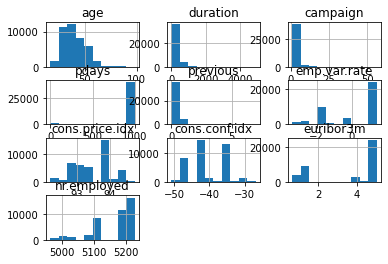

In [29]:
# histograms
df.hist()
pyplot.show()

<Figure size 2160x2160 with 0 Axes>

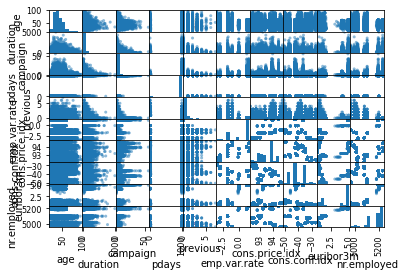

In [38]:
# scatter plot matrix
plt.figure(figsize=(30, 30))

scatter_matrix(df)
pyplot.show()

In [73]:
my_list = ['emp.var.rate','cons.price.idx','y']

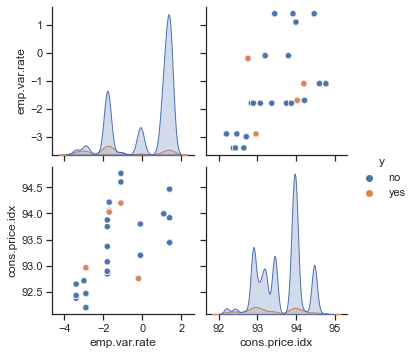

In [74]:
sns.set(style ='ticks')
sns.pairplot(data = df[my_list], hue = 'y')
plt.show()

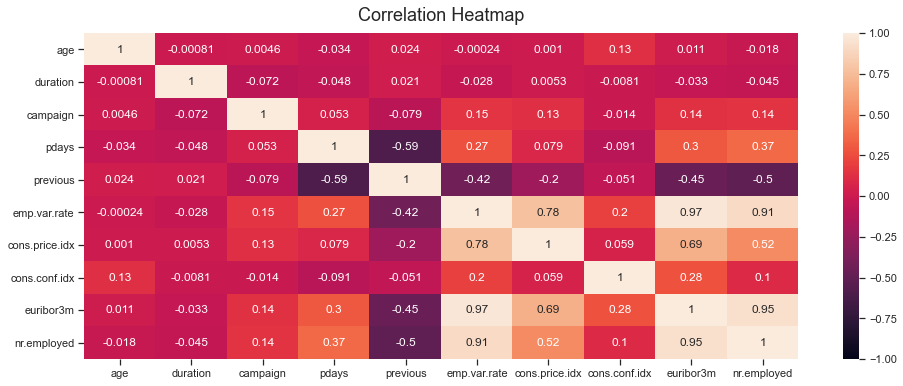

In [75]:
#Let's verify correlation between features 
#Plot features correlation
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);
# save heatmap as .png file
plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')

In [76]:
categorical_columns = list(df.select_dtypes(include = ['object']).columns)
print(categorical_columns)

[]


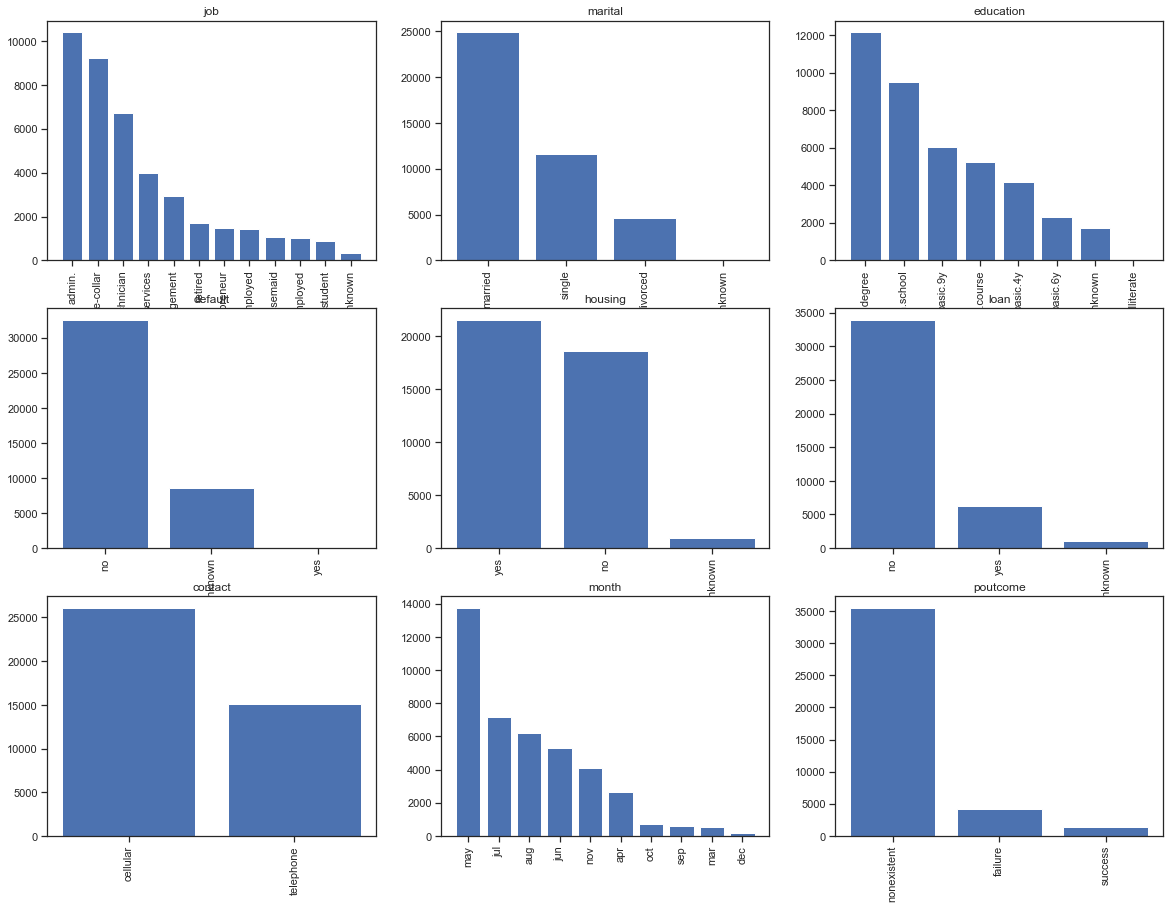

In [77]:
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month','poutcome']

fig, axs = plt.subplots(3, 3, sharex=False, sharey=False, figsize=(20, 15))

counter = 0
for categorical_column in categorical_columns:
    value_counts =df[categorical_column].value_counts()
    
    trace_x = counter // 3
    trace_y = counter % 3
    x_pos = np.arange(0, len(value_counts))
    
    axs[trace_x, trace_y].bar(x_pos, value_counts.values, tick_label = value_counts.index)
    
    axs[trace_x, trace_y].set_title(categorical_column)
    
    for tick in axs[trace_x, trace_y].get_xticklabels():
        tick.set_rotation(90)
    
    counter += 1

plt.show()

In [78]:
numeric_types = list(df.select_dtypes(include = ['int64', 'float64']).columns)

<AxesSubplot:title={'center':'Deposit Client repartition'}>

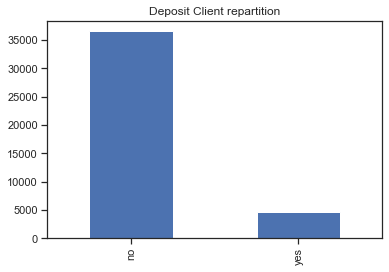

In [79]:
value_counts =df['y'].value_counts()

value_counts.plot.bar(title = 'Deposit Client repartition')

<AxesSubplot:title={'center':'job custome repartition'}>

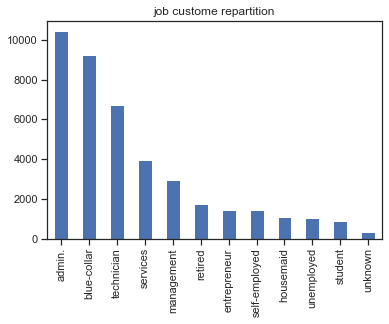

In [80]:
value_counts = df['job'].value_counts()

value_counts.plot.bar(title = 'job custome repartition')

<AxesSubplot:title={'center':'marital repartition'}>

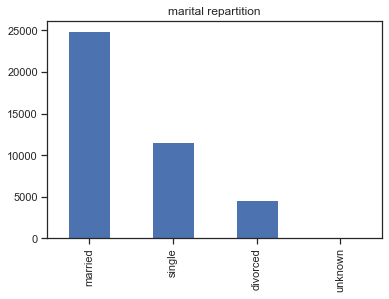

In [81]:
value_counts = df['marital'].value_counts()

value_counts.plot.bar(title = 'marital repartition')

<AxesSubplot:title={'center':'education repartition per client'}>

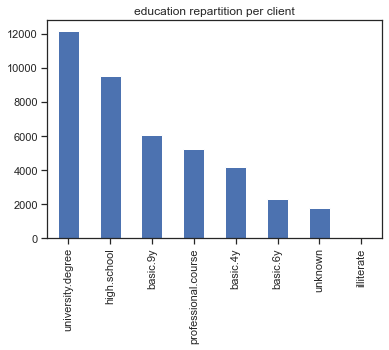

In [82]:
value_counts = df['education'].value_counts()

value_counts.plot.bar(title = 'education repartition per client')

<AxesSubplot:title={'center':'client repartition per loan '}>

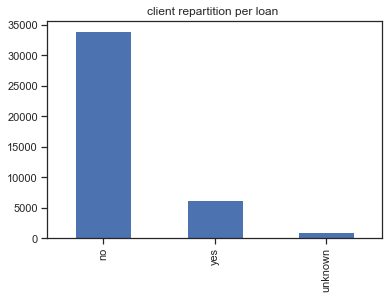

In [83]:
value_counts = df['loan'].value_counts()

value_counts.plot.bar(title = 'client repartition per loan ')

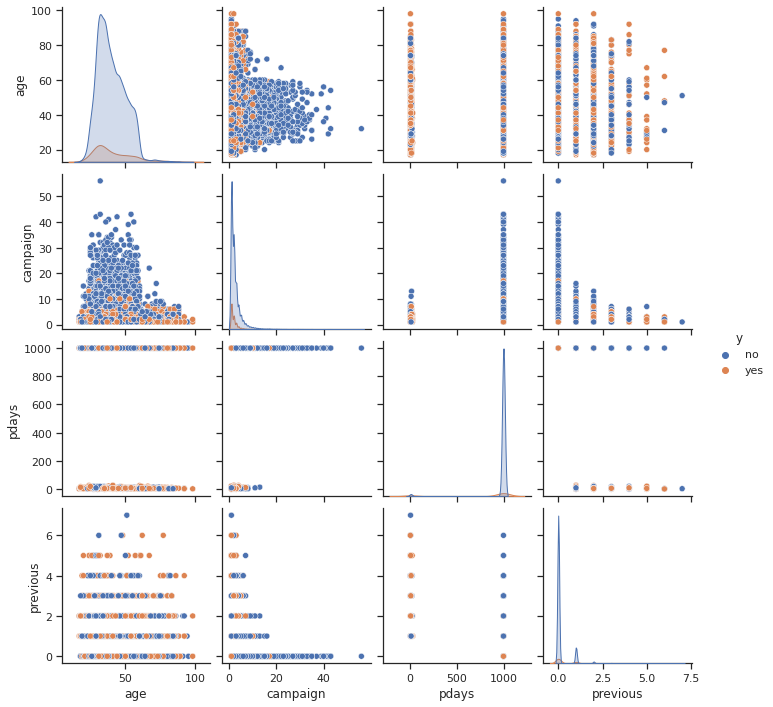

In [45]:
sns.set(style ='ticks')
sns.pairplot(data = bank_additional_full[my_list], hue = 'y')
plt.show()

### **Let's check correlation of a specific numeric variable that can have economic effect on target variable**

In [53]:
Economic_var = ["cons_price_idx", "cons_conf_idx", "euribor3m", "emp_var_rate", "y"]
bank_additional_full[Economic_var].corr()

,cons_price_idx,cons_conf_idx,euribor3m,emp_var_rate
cons_price_idx,1.000000,0.058986,0.688230,0.775334
cons_conf_idx,0.058986,1.000000,0.277686,0.196041
euribor3m,0.688230,0.277686,1.000000,0.972245
emp_var_rate,0.775334,0.196041,0.972245,1.000000


<AxesSubplot:title={'center':'client repartition per poutcome'}>

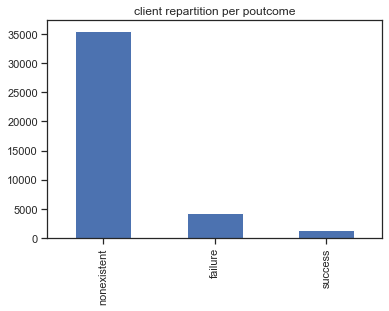

In [84]:
value_counts = df['poutcome'].value_counts()

value_counts.plot.bar(title = 'client repartition per poutcome')

## Multiple regression analysis

In [98]:
# dataframe that contains: Age, sexe, PCT, PCR, CRP and D-dimer
df1 = df.iloc[:, 0:2 ]  # d-dimer
df1=df1.dropna()
df1

,age,job
0,56,housemaid
1,57,services
2,37,services
3,40,admin.
4,56,services
...,...,...
41183,73,retired
41184,46,blue-collar
41185,56,retired
41186,44,technician


In [99]:
df1.shape

(41176, 2)

In [87]:
# # variables
# X = df1['age']
# Y = df_bio['D-DIMER']

# reshape
X = df1.iloc[:,0:2].values.reshape(-1, 1)  # values converts it into a numpy array   # age
Y = df.iloc[:, 21].values.reshape(-1, 1)  # d-dimer


X = df1[['SEXE','PCR', 'PCT', 'CRP','age']] # here we have 2 variables for multiple regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example.Alternatively, you may add additional variables within the brackets
Y = df1['D-DIMER']
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, Y)


print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

NameError: name 'linear_model' is not defined

## **Let's plot Hist and verify distribution**

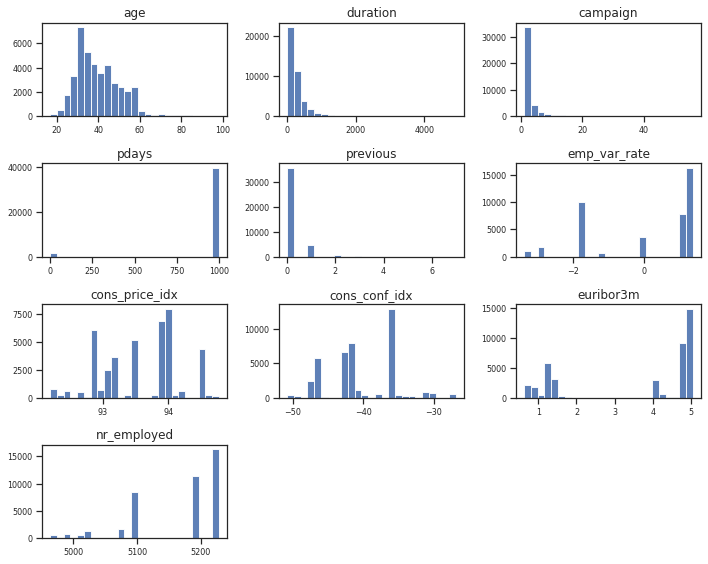

In [51]:
bank_additional_full[numeric_col].hist(figsize=(10,8), bins=25, xlabelsize=8, ylabelsize=8, alpha=0.9, grid=False)
plt.tight_layout();

## **Let's convert the target to a binary**

In [54]:
bank_additional_full['target'] = bank_additional_full.apply(lambda row: 1 if row["y"] == "yes" else 0, axis=1)
bank_additional_full.drop(["y"],axis=1,inplace=True)

## **let's verify if the data is imbalenced or not**

[0] Clients not subscribedto  the term deposit: 36548
[1] Clients subscribed to the term deposit: 4640


,clients,%
0,36548,88.73
1,4640,11.27


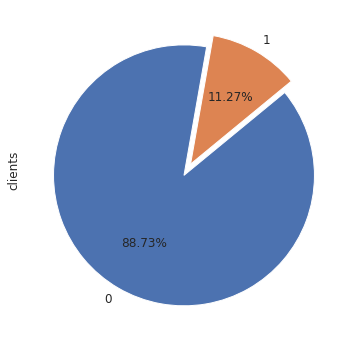

In [55]:
target_to_clients= bank_additional_full.target.value_counts().to_frame().rename(columns={"target":"clients"})
calcul_percent = (bank_additional_full.target.value_counts(normalize=True) *100).to_frame().rename(columns={"target":"%"})
bank_additional_full_balenced = pd.concat([target_to_clients,calcul_percent],axis=1).round(decimals=2)

print(f"[0] Clients not subscribedto  the term deposit: {bank_additional_full.target.value_counts()[0]}")
print(f"[1] Clients subscribed to the term deposit: {bank_additional_full.target.value_counts()[1]}")

display(bank_additional_full_balenced)
target_to_clients.plot(kind='pie', subplots=True, autopct='%1.2f%%', 
             explode= (0.05, 0.05), startangle=80, 
             legend=False, fontsize=12, figsize=(14,6));

## **Let's verify boxplot and distribution using graph**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


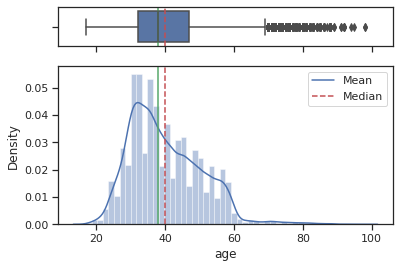

In [56]:
AGE = bank_additional_full.age
np.array(AGE).mean()
np.median(AGE)


f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.5, 2)})
mean=np.array(AGE).mean()
median=np.median(AGE)

sns.boxplot(AGE, ax=ax_box)
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')
sns.distplot(AGE, ax=ax_hist)

ax_hist.axvline(mean, color='r', linestyle='--')
ax_hist.axvline(median, color='g', linestyle='-')
plt.legend({'Mean':mean,'Median':median})
ax_box.set(xlabel='')

plt.show()

# Model Selection and Model Building

In [19]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [4]:
#Implementing one-hot encoding through category_encoder

ce_OHE = ce.OneHotEncoder(cols=['job','marital','education', 'default', 'housing', 'loan',
       'contact', 'month','day_of_week','poutcome'])

df1 = ce_OHE.fit_transform(df)
df1.head()

,age,job_1,job_2,job_3,job_4,job_5,job_6,job_7,job_8,job_9,...,previous,poutcome_1,poutcome_2,poutcome_3,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,1,0,0,0,0,0,0,0,0,...,0,1,0,0,1.1,93.994,-36.4,4.857,5191.0,no
1,57,0,1,0,0,0,0,0,0,0,...,0,1,0,0,1.1,93.994,-36.4,4.857,5191.0,no
2,37,0,1,0,0,0,0,0,0,0,...,0,1,0,0,1.1,93.994,-36.4,4.857,5191.0,no
3,40,0,0,1,0,0,0,0,0,0,...,0,1,0,0,1.1,93.994,-36.4,4.857,5191.0,no
4,56,0,1,0,0,0,0,0,0,0,...,0,1,0,0,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
df1.columns

Index(['age', 'job_1', 'job_2', 'job_3', 'job_4', 'job_5', 'job_6', 'job_7',
       'job_8', 'job_9', 'job_10', 'job_11', 'job_12', 'marital_1',
       'marital_2', 'marital_3', 'marital_4', 'education_1', 'education_2',
       'education_3', 'education_4', 'education_5', 'education_6',
       'education_7', 'education_8', 'default_1', 'default_2', 'default_3',
       'housing_1', 'housing_2', 'housing_3', 'loan_1', 'loan_2', 'loan_3',
       'contact_1', 'contact_2', 'month_1', 'month_2', 'month_3', 'month_4',
       'month_5', 'month_6', 'month_7', 'month_8', 'month_9', 'month_10',
       'day_of_week_1', 'day_of_week_2', 'day_of_week_3', 'day_of_week_4',
       'day_of_week_5', 'duration', 'campaign', 'pdays', 'previous',
       'poutcome_1', 'poutcome_2', 'poutcome_3', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [21]:
# Split-out validation dataset
array = df1.values
X = array[:,0:63]
y = array[:,63]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1)
#80% of the data are used for the training and 20% are used for the validation
# x_train and y_train are for preparing the models

In [28]:
# We don’t know which algorithms would be good on this problem or what configurations to use.

# We get an idea from the plots that some of the classes are partially linearly separable in some dimensions, so we are expecting generally good results.

# Let’s test 6 different algorithms:

# Logistic Regression (LR)
# Linear Discriminant Analysis (LDA)
# K-Nearest Neighbors (KNN).
# Classification and Regression Trees (CART).
# Gaussian Naive Bayes (NB).
# Support Vector Machines (SVM).
# This is a good mixture of simple linear (LR and LDA), nonlinear (KNN, CART, NB and SVM) algorithms.

In [22]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))








# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.911411 (0.003716)
LDA: 0.910522 (0.003316)
KNN: 0.904549 (0.003764)
CART: 0.891285 (0.004585)
NB: 0.861847 (0.005321)
SVM: 0.897442 (0.003076)


In [29]:
# LR has the largest estimated accuracy score at about 0.98 or 98%.

In [30]:
# We can also create a plot of the model evaluation results and compare the spread and the mean accuracy of each model. 
# There is a population 
# of accuracy measures for each algorithm because each algorithm was evaluated 10 times (via 10 fold-cross validation).

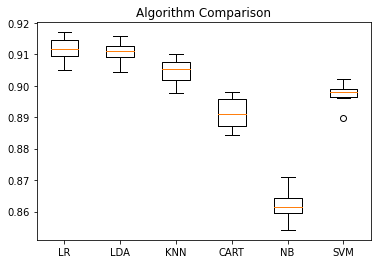

In [25]:
# Compare Algorithms
from matplotlib import pyplot

pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()

In [31]:
# We must choose an algorithm to use to make predictions.

# The results in the previous section suggest that the LR
# was perhaps the most accurate model. We will use this model as our final model.

# Now we want to get an idea of the accuracy of the model on our validation set.

# This will give us an independent final check on the accuracy of the best model. It is valuable to keep a 
# validation set just in case you made a slip during training, such 
# as overfitting to the training set or a data leak. Both of these issues will result in an overly optimistic result.

In [32]:
...
# Make predictions on validation dataset
# model = SVC(gamma='auto')
model = LogisticRegression(solver='liblinear', multi_class='ovr')
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

In [33]:
# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9169321244792943
[[7109  190]
 [ 488  375]]
              precision    recall  f1-score   support

          no       0.94      0.97      0.95      7299
         yes       0.66      0.43      0.53       863

    accuracy                           0.92      8162
   macro avg       0.80      0.70      0.74      8162
weighted avg       0.91      0.92      0.91      8162

